In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sports = pd.read_csv("Data/CleanedDataSports.csv")
sports.head()

,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Average,2600,3DS,...,PS4,PSP,PSV,SAT,SNES,Wii,WiiU,X,X360,XOne
0,2006,1,41.36,28.96,3.77,8.45,82.54,33.016,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2009,1,15.61,10.95,3.28,2.95,32.78,13.114,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2007,1,8.92,8.03,3.60,2.15,22.70,9.080,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2009,1,9.01,8.49,2.53,1.77,21.79,8.718,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2016,1,0.90,6.75,0.09,1.33,9.07,3.628,0,0,...,1,0,0,0,0,0,0,0,0,0


In [2]:
#calculate average sales for action genre from 1997 to 2011
data = {'Year': [],
        'Average Sales': []}
sales = pd.DataFrame(data)
year = 1997
for i in range(15):
    x = sports[sports['Year_of_Release'] == year]
    avg = x['Average'].mean()
    globalsales = x['Global_Sales'].mean()
    
    data = {'Year': year,
            'Average Sales': avg,
            'Global Sales': globalsales}
    sales = sales.append(data, ignore_index=True)
    year += 1

sales['Year'] = sales['Year'].astype(int) 
sales

,Year,Average Sales,Global Sales
0,1997,1.118000,2.790000
1,1998,NaN,NaN
2,1999,2.008000,5.020000
3,2000,1.872000,4.680000
4,2001,1.318000,3.292500
5,2002,1.378000,3.444000
6,2003,1.552500,3.880000
7,2004,1.383200,3.458000
8,2005,1.756667,4.393333
9,2006,9.553500,23.882500


In [3]:
#replace NaN values with average
gblAvg = sales['Global Sales'].mean()
Avg = sales['Average Sales'].mean()
sales['Global Sales'] = sales['Global Sales'].replace(np.nan, gblAvg)
sales['Average Sales'] = sales['Average Sales'].replace(np.nan, Avg)
sales.head()

,Year,Average Sales,Global Sales
0,1997,1.118000,2.790000
1,1998,2.359407,5.897872
2,1999,2.008000,5.020000
3,2000,1.872000,4.680000
4,2001,1.318000,3.292500


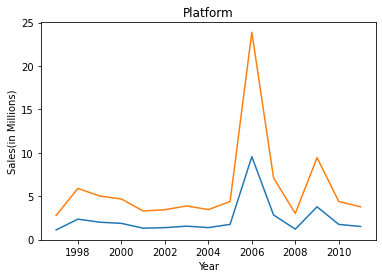

In [4]:
#sales plot
plt.plot(sales['Year'], sales['Average Sales'], sales['Year'], sales['Global Sales'])
plt.title('Platform')
plt.xlabel('Year')
plt.ylabel('Sales(in Millions)')
plt.show()

In [2]:
#for SVR algorithm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

y = sports['Average'] #output
ygl = sports['Global_Sales']
X = np.array(sports['Year_of_Release']).reshape(-1,1) #input

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
Xgl_train, Xgl_test, ygl_train, ygl_test = train_test_split(X, y, test_size=0.2)

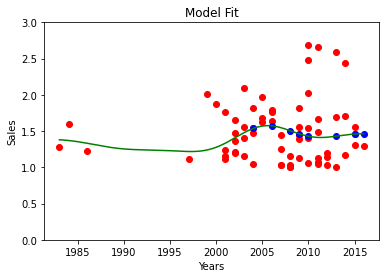

In [3]:
model = SVR(kernel='rbf')
modelgl = SVR(kernel='rbf')

model.fit(X_train, y_train)
modelgl.fit(Xgl_train, ygl_train)
prediction = model.predict(X_test)
predictiongl = modelgl.predict(Xgl_test)
# model.score(X_test, y_test)

# prediction

X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

# plt.scatter(X_test, prediction)
plt.ylim(top=3)
plt.title('Model Fit')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.scatter(X_train, y_train, color='red')
plt.plot(X_grid, model.predict(X_grid), color='green')
plt.scatter(X_test, prediction, color='blue')
plt.show()  #why you do dis???

In [29]:
#mean squared error (manual)
tot = 0
for x in range(9):
    y = (np.array(y_test)[x]-prediction[x])**2
    tot = tot + y
print(tot/9)

0.30373849438435313


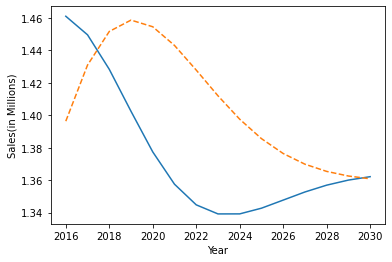

In [4]:
#make predictions
year = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
data = {'Prediction_Year': [],
        'Predicted_Sales': [],
        'Global': []}
future_sales = pd.DataFrame(data)
future_sales['Prediction_Year'] = future_sales['Prediction_Year'].astype(int)

for i in range(15):
    x = model.predict([[year[i]]])
    xgl = modelgl.predict([[year[i]]])
    data = {'Prediction_Year': year[i],
            'Predicted_Sales': x,
            'Global': xgl}
    future_sales = future_sales.append(data, ignore_index=True)

plt.plot(future_sales['Prediction_Year'], future_sales['Predicted_Sales'])
plt.plot(future_sales['Prediction_Year'], future_sales['Global'], ls = '--')
plt.xlabel('Year')
plt.ylabel('Sales(in Millions)')
plt.show()


In [5]:
import joblib

filename = 'savedModels/platform.joblib'
joblib.dump(model, filename)

['savedModels/platform.joblib']

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import statistics

print(mean_squared_error(y_test, prediction))
test_rmse = sqrt(mean_squared_error(y_test, prediction))
print(test_rmse/statistics.mean(y_test))

6.445115334668127
1.082252204024757


In [25]:
print(test_rmse)

2.5387231701522968


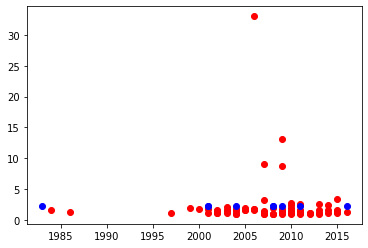

array([2.34139289])

In [12]:
#for XGBoost algorithm
# from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression

# xgb_classifier = XGBClassifier()
# xgb_classifier.fit(X_train, y_train)
# prediction_xgb = xgb_classifier.predict(X_test)

line = LinearRegression()
linegbl = LinearRegression()
line.fit(X_train, y_train)
linegbl.fit(Xgl_train, ygl_train)
prediction_lin = line.predict(X_test)


plt.scatter(X_train, y_train, color='red')
plt.scatter(X_test, prediction_lin, color='blue')
plt.show()
line.predict([[2005]])

In [13]:
rmse_lin = mean_squared_error(y_test, prediction_lin)
print(rmse_lin)

1.2580344138209398


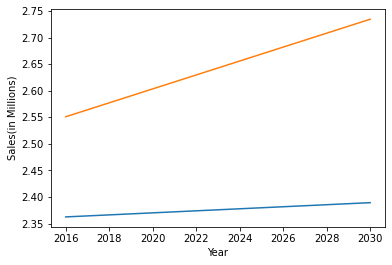

,Prediction_Year,Predicted_Sales,Global Sales
0,2016,[2.36245736168267],[2.5510500312795763]
1,2017,[2.364372313671696],[2.564159349384834]
2,2018,[2.366287265660722],[2.5772686674900953]
3,2019,[2.368202217649748],[2.590377985595353]
4,2020,[2.370117169638774],[2.6034873037006143]
5,2021,[2.3720321216278],[2.616596621805872]
6,2022,[2.3739470736168267],[2.6297059399111333]
7,2023,[2.3758620256058527],[2.6428152580163946]
8,2024,[2.3777769775948787],[2.6559245761216523]
9,2025,[2.3796919295839047],[2.6690338942269136]


In [14]:
year = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
data = {'Prediction_Year': [],
        'Predicted_Sales': [],
        'Global Sales': []}
future_sales_lin = pd.DataFrame(data)
future_sales_lin['Prediction_Year'] = future_sales_lin['Prediction_Year'].astype(int)

for i in range(15):
    lin = line.predict([[year[i]]])
    lingbl = linegbl.predict([[year[i]]])
    data = {'Prediction_Year': year[i],
            'Predicted_Sales': lin,
            'Global Sales': lingbl}
    future_sales_lin = future_sales_lin.append(data, ignore_index=True)

plt.plot(future_sales_lin['Prediction_Year'], future_sales_lin['Predicted_Sales'], future_sales_lin['Prediction_Year'], future_sales_lin['Global Sales'])
plt.xlabel('Year')
plt.ylabel('Sales(in Millions)')
plt.show()
future_sales_lin

In [15]:
print(modelgl.predict([[2031]]))
print(linegbl.predict([[2056]]))

[1.40879298]
[3.07542276]


In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(72, 1) (9, 1) (72,) (9,)


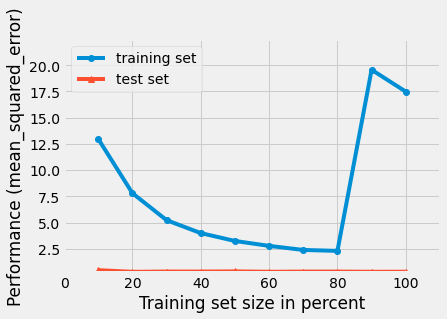

In [30]:
from mlxtend.plotting import plot_learning_curves

#change C and epsilon values
#over, under and best fit

clf = SVR(kernel='rbf')
# clf2 = LinearRegression()

plot_learning_curves(X_train, y_train, X_test, y_test, clf, scoring='mean_squared_error', print_model=False)
plt.show()